https://datascience.stackexchange.com/questions/68082/semantic-text-similarity-using-bert
https://github.com/llSourcell/word_vectors_game_of_thrones-LIVE/blob/master/demo.ipynb
https://github.com/llSourcell/word_vectors_game_of_thrones-LIVE/blob/master/Thrones2Vec.ipynb
https://github.com/hanxiao/bert-as-service#building-a-qa-semantic-search-engine-in-3-minutes
https://colab.research.google.com/drive/1W5yvUDjgidfiwIgo9ZMiztbaLyYOW2V5#scrollTo=beP_QyyXkhsl
https://shangan.medium.com/semantic-similar-sentences-with-your-dataset-nlp-94fd1d49d231
https://rare-technologies.com/doc2vec-tutorial/
https://realpython.com/nltk-nlp-python/
https://towardsdatascience.com/overview-of-text-similarity-metrics-3397c4601f50
https://stackabuse.com/python-for-nlp-working-with-the-gensim-library-part-1


To find similar sentence we will be using mbedding technique provided by NLP. Sentences will be tokenized by converting them to numbers and then represented in a Vector format. The vector is then used with cosine similarity or distance algorithm to find the shortest distance to the word or words.

In [32]:
!pip install gensim
!pip install nltk
!pip install wordcloud

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy

In [17]:
path = '../data/Live Site Issues.csv'
liveSiteAll = pd.read_csv(path)
liveSiteAll.drop(['App Created By','App Modified By','Content Type','Modified','Modified By','Item Type','Item Type','Defect number','Assigned To','Status','Time Taken CE to Resolve the Issue','Folder Child Count','Path','Item Child Count','Time taken to unblock the customer'], inplace=True, axis=1)

liveSiteAllDescSol = liveSiteAll['Issue']

liveSiteAllDescSolSubset = liveSiteAllDescSol.head(20)
data = liveSiteAllDescSolSubset.values.tolist()
print(data)


['Microsoft Office 365 (CA) tenants being deleted because of missing MaintenanceSKU', 'Customer 0123456789 requires manual intervention', 'Customer 0123456789 Service Request requires manual intervention', 'Customer 0123456789 tenant is not created for Sage 100 ERP ', 'Sage Business Center consent issue', 'Office 365 Account that has gone suspended -  INC0732959 ', 'UK Account transfer failed for 64256790, 64256949 and 64254058', '4007045975 - Invalid email, Requires Manual Intervention', 'Invalid email address for O365 US', 'Duplicate payroll elements found in SLS data', 'Customer Office 365 tenant deleted during sync', 'Cloud Flare protection to CE SignOn endpoint suddenly prevented traffic to reach service', '63823004 - x Trade Services. Tenant needs to be reinstated', 'O365 US - Customer address failed MS validation', '020202020 - Customer address not validated  by MS', 'Customer entitlement missng contract effective dates', 'O365 200c order was placed against 50c', 'Error finding 

In [24]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

#https://www.nltk.org/api/nltk.tokenize.html
#tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data)]
stop_words = stopwords.words('english')
stop_words.extend(['-'])
def clenTokens(word_tokens):
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []
 
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    return filtered_sentence
    
tagged_data = [TaggedDocument(words=clenTokens(word_tokenize(_d.lower())), tags=[str(i)]) for i, _d in enumerate(data)]

# hyper parameters
#https://radimrehurek.com/gensim/models/doc2vec.html
max_epochs = 500
vec_size =200
alpha = 0.03
minimum_alpha = 0.0025
reduce_alpha = 0.0002


model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=minimum_alpha,
                dm =1,#distributed memory (PV-DM) 
               min_count=1)#very critical, if min is 2 ormore the result is inacurate
model.build_vocab(tagged_data)

# Train the model based on epochs parameter
for epoch in range(max_epochs):
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=20)
    
    
# Save model. 
model.save("similar_sentence.model")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\stotlyakov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\stotlyakov\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Use the model

In [25]:
model= Doc2Vec.load("similar_sentence.model")

def output_sentences(most_similar):
    print('\n')
    for label, index in [('Highest match', 0), ('Second match', 1), ('Third match', 2), ('Fourth match', 3)]:
      print(u'%s %s: %s\n' % (label, most_similar[index][1], data[int(most_similar[index][0])]))
    print('=====================\n')
 
seed_text = 'Customer address is not valid'
tokens = seed_text.split()
vector = model.infer_vector(tokens)
most_similar = model.dv.most_similar([vector]) 

output_sentences(most_similar)



Highest match 0.6656834483146667: 020202020 - Customer address not validated  by MS

Second match 0.6158204078674316: O365 US - Customer address failed MS validation

Third match 0.5566930174827576: Error finding commerce account:Commerce account not found

Fourth match 0.5545989871025085: Invalid email address for O365 US




In [26]:
print(tagged_data)

[TaggedDocument(words=['microsoft', 'office', '365', '(', 'ca', ')', 'tenants', 'deleted', 'missing', 'maintenancesku'], tags=['0']), TaggedDocument(words=['customer', '0123456789', 'requires', 'manual', 'intervention'], tags=['1']), TaggedDocument(words=['customer', '0123456789', 'service', 'request', 'requires', 'manual', 'intervention'], tags=['2']), TaggedDocument(words=['customer', '0123456789', 'tenant', 'created', 'sage', '100', 'erp'], tags=['3']), TaggedDocument(words=['sage', 'business', 'center', 'consent', 'issue'], tags=['4']), TaggedDocument(words=['office', '365', 'account', 'gone', 'suspended', 'inc0732959'], tags=['5']), TaggedDocument(words=['uk', 'account', 'transfer', 'failed', '64256790', ',', '64256949', '64254058'], tags=['6']), TaggedDocument(words=['4007045975', 'invalid', 'email', ',', 'requires', 'manual', 'intervention'], tags=['7']), TaggedDocument(words=['invalid', 'email', 'address', 'o365', 'us'], tags=['8']), TaggedDocument(words=['duplicate', 'payroll'

## Do some analytics on the available support text. Find out the common issues.

In [71]:

texts = data

import re
cleanedText = []
for t in texts:
    cleanedText.append(re.sub('\d', '', t))

    
# vectorization of the texts
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(cleanedText).todense()
# used words (axis in our multi-dimensional space)
words = vectorizer.get_feature_names()
print("words", words)


n_clusters=7
number_of_seeds_to_try=10
max_iter = 300
number_of_process=2 # seads are distributed
model = KMeans(n_clusters=n_clusters, max_iter=max_iter, n_init=number_of_seeds_to_try, n_jobs=number_of_process).fit(X)

from sklearn.decomposition import PCA
y_kmeans = model.predict(X)
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)


labels = model.labels_.tolist()
# indices of preferible words in each cluster
ordered_words = model.cluster_centers_.argsort()[:, ::-1]

print("centers:", model.cluster_centers_)
print("labels", labels)
print("intertia:", model.inertia_)

texts_per_cluster = numpy.zeros(n_clusters)
for i_cluster in range(n_clusters):
    for label in labels:
        if label==i_cluster:
            texts_per_cluster[i_cluster] +=1 

print("Top words per cluster:")
for i_cluster in range(n_clusters):
    print("Cluster:", i_cluster, "texts:", int(texts_per_cluster[i_cluster])),
    for term in ordered_words[i_cluster, :10]:
        print("\t"+words[term])

print("\n")
print("Prediction")

text_to_predict = "Data Service Deployment not processing"
Y = vectorizer.transform([text_to_predict])
predicted_cluster = model.predict(Y)[0]
texts_per_cluster[predicted_cluster]+=1

print(text_to_predict)
print("Cluster:", predicted_cluster, "texts:", texts_per_cluster[predicted_cluster]),
for term in ordered_words[predicted_cluster, :10]:
    print("\t"+words[term])

words ['account', 'activate', 'address', 'business', 'ca', 'calling', 'ce', 'center', 'cloud', 'commerce', 'consent', 'contract', 'create', 'created', 'customer', 'data', 'dates', 'deleted', 'duplicate', 'effective', 'elements', 'email', 'endpoint', 'entitlement', 'erp', 'error', 'exception', 'failed', 'finding', 'flare', 'gone', 'intervention', 'invalid', 'issue', 'loguseraccess', 'maintenancesku', 'manual', 'message', 'microsoft', 'missing', 'missng', 'ms', 'needs', 'office', 'order', 'payroll', 'placed', 'prevented', 'protection', 'reach', 'reinstated', 'request', 'requires', 'sage', 'service', 'services', 'signon', 'sls', 'suddenly', 'suspended', 'sync', 'tenant', 'tenantid', 'tenants', 'trade', 'traffic', 'transfer', 'uk', 'useraccesslogsvc', 'validated', 'validation']
centers: [[1.38777878e-17 0.00000000e+00 2.44504409e-01 0.00000000e+00
  3.46944695e-18 4.96721806e-02 1.73472348e-18 0.00000000e+00
  1.73472348e-18 6.93889390e-18 0.00000000e+00 0.00000000e+00
  4.96721806e-02 0.0

C:\Users\stotlyakov\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.



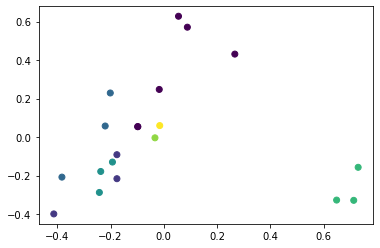

In [72]:
import matplotlib.pyplot as plt
plt.scatter(data2D[:,0], data2D[:,1], c=labels)


In [73]:
words = vectorizer.get_feature_names()
print(words)

['account', 'activate', 'address', 'business', 'ca', 'calling', 'ce', 'center', 'cloud', 'commerce', 'consent', 'contract', 'create', 'created', 'customer', 'data', 'dates', 'deleted', 'duplicate', 'effective', 'elements', 'email', 'endpoint', 'entitlement', 'erp', 'error', 'exception', 'failed', 'finding', 'flare', 'gone', 'intervention', 'invalid', 'issue', 'loguseraccess', 'maintenancesku', 'manual', 'message', 'microsoft', 'missing', 'missng', 'ms', 'needs', 'office', 'order', 'payroll', 'placed', 'prevented', 'protection', 'reach', 'reinstated', 'request', 'requires', 'sage', 'service', 'services', 'signon', 'sls', 'suddenly', 'suspended', 'sync', 'tenant', 'tenantid', 'tenants', 'trade', 'traffic', 'transfer', 'uk', 'useraccesslogsvc', 'validated', 'validation']


In [74]:
vectorizer.vocabulary_

{'microsoft': 38,
 'office': 43,
 'ca': 4,
 'tenants': 63,
 'deleted': 17,
 'missing': 39,
 'maintenancesku': 35,
 'customer': 14,
 'requires': 52,
 'manual': 36,
 'intervention': 31,
 'service': 54,
 'request': 51,
 'tenant': 61,
 'created': 13,
 'sage': 53,
 'erp': 24,
 'business': 3,
 'center': 7,
 'consent': 10,
 'issue': 33,
 'account': 0,
 'gone': 30,
 'suspended': 59,
 'uk': 67,
 'transfer': 66,
 'failed': 27,
 'invalid': 32,
 'email': 21,
 'address': 2,
 'duplicate': 18,
 'payroll': 45,
 'elements': 20,
 'sls': 57,
 'data': 15,
 'sync': 60,
 'cloud': 8,
 'flare': 29,
 'protection': 48,
 'ce': 6,
 'signon': 56,
 'endpoint': 22,
 'suddenly': 58,
 'prevented': 47,
 'traffic': 65,
 'reach': 49,
 'trade': 64,
 'services': 55,
 'needs': 42,
 'reinstated': 50,
 'ms': 41,
 'validation': 70,
 'validated': 69,
 'entitlement': 23,
 'missng': 40,
 'contract': 11,
 'effective': 19,
 'dates': 16,
 'order': 44,
 'placed': 46,
 'error': 25,
 'finding': 28,
 'commerce': 9,
 'activate': 1,
 'log

In [54]:
sort_orders = sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1], reverse=True)[:20]

xplot = []
yplot = []

for i in sort_orders:
    xplot.append(i[1])
    yplot.append(i[0])
    
import plotly.graph_objects as go

dict_of_fig = dict({
    "data": [{"type": "bar",
              "x": xplot,
              "y": yplot}],
    "layout": {"title": {"text": "Show the most common words in the support ticket issue description"}}
})

fig = go.Figure(dict_of_fig)

fig.show()


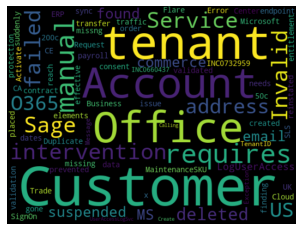

In [37]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcl = WordCloud(width=530, height=400).generate(" ".join(data))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
counts = pd.DataFrame(vectorizer.fit_transform(texts).toarray(),
                      columns=vectorizer.get_feature_names())
counts.T.sort_values(by=1, ascending=False).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0123456789,0.000000,0.468989,0.368501,0.350196,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
intervention,0.000000,0.468989,0.368501,0.000000,0.0,0.000000,0.0,0.382985,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
requires,0.000000,0.468989,0.368501,0.000000,0.0,0.000000,0.0,0.382985,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
manual,0.000000,0.468989,0.368501,0.000000,0.0,0.000000,0.0,0.382985,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
customer,0.000000,0.346697,0.272412,0.258880,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.300733,0.0,0.0,0.293034,0.302968,0.253648,0.000000,0.0,0.000000,0.0
ms,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.439296,0.454188,0.000000,0.000000,0.0,0.000000,0.0
placed,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.464783,0.0,0.000000,0.0
payroll,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.447214,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
order,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.464783,0.0,0.000000,0.0
office,0.276015,0.000000,0.000000,0.000000,0.0,0.340301,0.0,0.000000,0.0,0.000000,0.372662,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.285926,0.0


In [11]:
# Read yelp.csv into a DataFrame.
path = '../../data/Live Site Issues all.xlsx'
liveSiteAll = pd.read_excel(path)
liveSiteAll.drop(['App Created By','App Modified By','Content Type','Modified','Modified By','Item Type','Item Type','Defect number','Assigned To','Status','Time Taken CE to Resolve the Issue','Folder Child Count','Path','Item Child Count','Time taken to unblock the customer'], inplace=True, axis=1)

liveSiteAllDescSol = liveSiteAll[['Description','Solution']]

liveSiteAllDescSolSubset = liveSiteAllDescSol.head(20)
liveSiteAllDescSolSubset

FileNotFoundError: [Errno 2] No such file or directory: '../../data/Live Site Issues all.xlsx'

In [12]:
l

NameError: name 'l' is not defined

<15x484 sparse matrix of type '<class 'numpy.int64'>'
	with 745 stored elements in Compressed Sparse Row format>

['traffic', 'transientfaulthandling', 'true', 'turned', 'two', 'type', 'uk', 'um', 'un', 'unable', 'unaccepted', 'unknown', 'unrecoverableexception', 'unsuccessful', 'update', 'updateentitlement', 'updatemscustomerorder', 'updatemsorder', 'urgency', 'us', 'use', 'user', 'useraccesslog', 'useraccesslogsvc', 'useraccessoriginator', 'users', 'uses', 'using', 'validation', 'verify', 'via', 'wad', 'warning', 'was', 'we', 'went', 'were', 'when', 'where', 'which', 'why', 'will', 'wins', 'with', 'workerrole', 'would', 'xanadu', 'xml', 'you', 'your']


['win', 'with', 'would', 'x', 'xanadu', 'xml', 'you', 'your', '“', '”']

(15, 433)

frozenset({'among', 'amount', 'please', 'to', 'below', 'only', 'part', 'others', 'mostly', 'move', 'un', 'perhaps', 'becoming', 'ten', 'via', 'so', 'than', 'no', 'everyone', 'every', 'while', 'give', 'whither', 'of', 'many', 'this', 'almost', 'is', 'find', 'why', 'ever', 'myself', 'nothing', 'my', 'last', 'hers', 'six', 'hereupon', 'some', 'we', 'someone', 'then', 'eight', 'hereafter', 'has', 'too', 'about', 'without', 'mine', 'couldnt', 'because', 'with', 'there', 'from', 'within', 'eg', 'system', 'either', 'latterly', 'never', 'were', 'which', 'thereby', 'more', 'how', 'cry', 'hasnt', 'besides', 'all', 'first', 'whereupon', 'everything', 'always', 'thru', 'whereas', 'except', 'once', 'yet', 'same', 'wherever', 'serious', 'cant', 'top', 'none', 'and', 'until', 'co', 'may', 'side', 'in', 'inc', 'can', 'thence', 'indeed', 'seems', 'me', 'per', 'whereafter', 'anywhere', 'name', 'might', 'latter', 'show', 'them', 'itself', 'its', 'your', 'at', 'sincere', 'both', 'describe', 'nor', 'they',

In [75]:
# Let's take a look at the vocabulary that was generated, containing 16,825 unique words.
#   'vocabulary_' is a dictionary that converts each word to its index in the sparse matrix.
#   - For example, the word "only" is index #10362 in the sparse matrix.

vect.vocabulary_

{'use': 403,
 'case': 89,
 'close': 100,
 'service': 343,
 'request': 312,
 'role': 319,
 'sagena.ce.common.backgroundtasks': 325,
 'message': 229,
 '2018-01-09t15:22:07.8804560z': 15,
 'error': 150,
 'customerid:4001713571': 123,
 'servicerequest': 344,
 '892f570d-d091-4320-89fe-ef40b3f87bf7': 32,
 'related': 308,
 'to': 381,
 'product': 292,
 "'microsoft": 1,
 'office': 259,
 '365': 20,
 'u': 391,
 'ha': 176,
 'unaccepted': 396,
 'closing': 101,
 'status': 359,
 "'rejectrecycle": 2,
 'servicerequestsvc.processforclose': 345,
 'when': 418,
 'an': 53,
 'global': 171,
 'admin': 46,
 'login': 217,
 'sage': 322,
 'app': 57,
 'and': 54,
 'perform': 282,
 'consent': 108,
 'which': 420,
 'require': 314,
 'the': 374,
 'permission': 283,
 'we': 415,
 'got': 173,
 '“': 431,
 'it': 207,
 'need': 246,
 'access': 37,
 'resource': 316,
 'in': 189,
 'your': 430,
 'organization': 269,
 'that': 373,
 'only': 265,
 'can': 87,
 'grant': 174,
 'please': 286,
 'ask': 62,
 'this': 378,
 'before': 76,
 'you